# Cleaning of scores data (Normalizing)



In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
sb.set() # set the default Seaborn style for graphics

In [8]:
air_data = pd.read_csv("listings_june.csv")
ratings = pd.DataFrame(air_data["review_scores_rating"])

In [19]:
air_data["new_ratings"]=air_data["review_scores_rating"].apply(np.floor)
ratings = pd.DataFrame(air_data["new_ratings"])

In [20]:
air_data["num_of_amenities"]= air_data["amenities"].apply(lambda n: len(n.split(",")))
air_data["num_of_amenities"].head()

0     7
1    12
2     8
3    25
4    21
Name: num_of_amenities, dtype: int64

<AxesSubplot:>

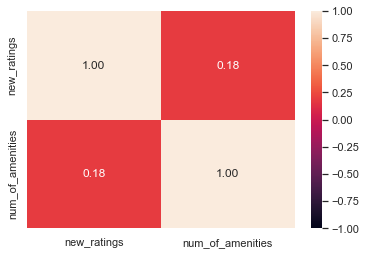

In [21]:
ratings = pd.DataFrame(air_data["new_ratings"])
num_amen = pd.DataFrame(air_data["num_of_amenities"])
jointDF = pd.concat([ratings, num_amen], axis = 1).reindex(ratings.index)
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

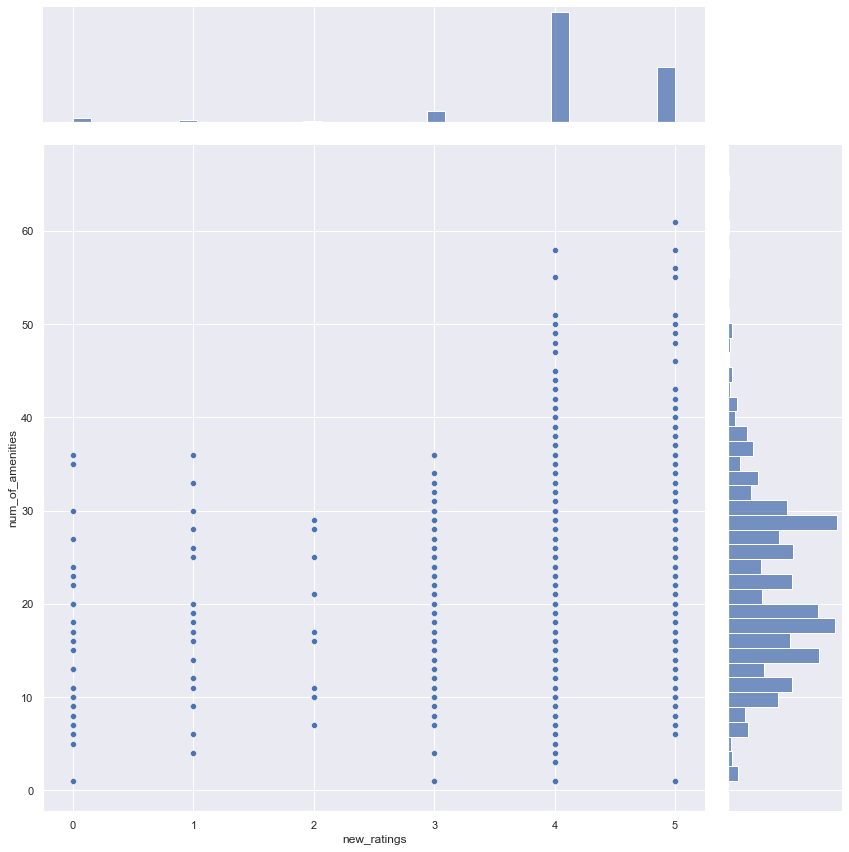

In [22]:
sb.jointplot(data = air_data, x = "new_ratings", y = "num_of_amenities", height = 12)